139525.6425594838
2144206.458932652
30720.24089259309
152158.27409598065
3815.8623470896628
1953721.5217099073
586528726.6252184
905873494.2677779
683643043.2750369
61.93462293319
12.730200295738594
118.01911547250978
[139525.6425594838, 2144206.458932652, 30720.24089259309, 152158.27409598065, 3815.8623470896628, 1953721.5217099073, 586528726.6252184, 905873494.2677779, 683643043.2750369, 61.93462293319, 12.730200295738594, 118.01911547250978]


/Users/roton/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


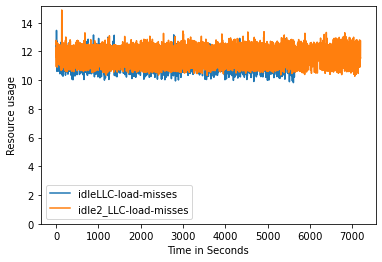

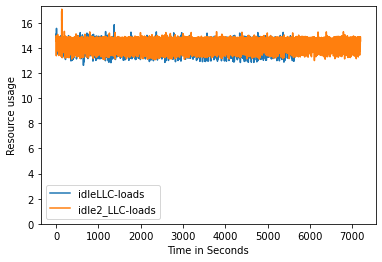

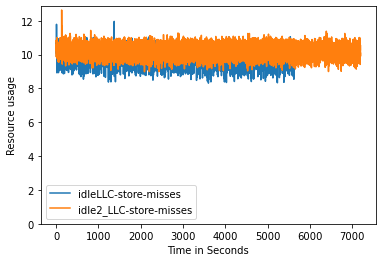

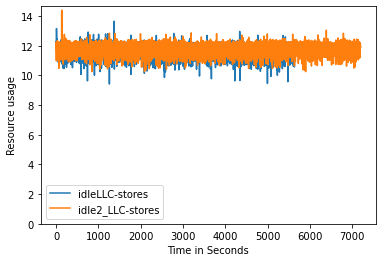

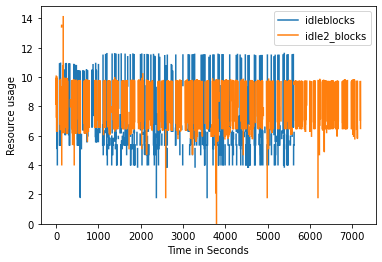

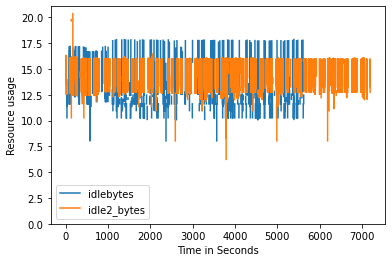

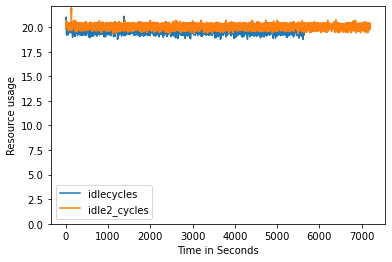

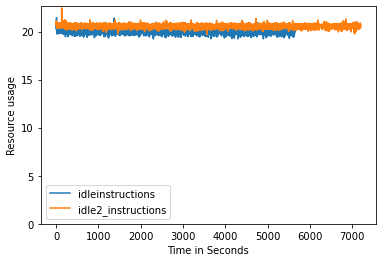

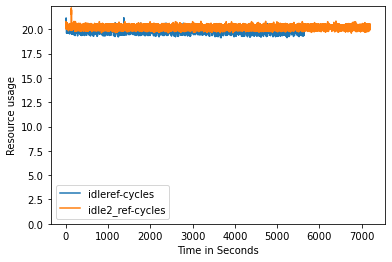

In [67]:
df_idle2 = pd.read_csv("datasets/final-idlerun.csv")
df_idle2 = df_idle2.loc[:, ~df_idle2.columns.str.contains('^Unnamed')]
df_idle = pd.read_csv("datasets/final-exp10idle.csv")
df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
df_mean = []
for i in df_idle2:
    df_mean.append(np.mean(df_idle2[i]))
    print(np.mean(df_idle2[i]))
print(df_mean)
colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
# i = 0
# for cols in colNames:
#     df_train[cols] -= df_mean[i]
#     df_test[cols] -= df_mean[i]
#     i += 1
dft_log = df_train.apply(lambda x: np.log(x))
dfi_log = df_idle.apply(lambda x: np.log(x))
dfi2_log = df_idle2.apply(lambda x: np.log(x))
for cols in colNames:
    fig, ax = plt.subplots()
    ax.plot(dfi_log[:7200].index, dfi_log[:7200][cols], label='idle'+cols)
    ax.plot(dfi2_log[:7200].index, dfi2_log[:7200][cols], label='idle2_'+cols)
    plt.legend()
    plt.ylabel("Resource usage")
    plt.xlabel("Time in Seconds")
    plt.ylim(ymin=0)
    plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
# all_datasets = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle', 'idlerun', 'stresscpu', 'stressdram', 'stressdisk']
all_datasets = ['exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi', 'cpuexp', 'memexp', 'diskexp', 'all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle', 'idlerun', 'stresscpu', 'stressdram', 'stressdisk']
df_all = {}
for i in all_datasets:
    df_all[i] = pd.read_csv("datasets/final-" + i + ".csv")
# df1 = pd.read_csv("datasets/final-mc.csv")
# df2 = pd.read_csv("datasets/final-tf.csv")
# df3 = pd.read_csv("datasets/final-mnn.csv")
# df4 = pd.read_csv("datasets/final-sys.csv")
# df5 = pd.read_csv("datasets/final-stress.csv")
# df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
# df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
# df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
# df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
# df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
for test in df_all:
    df_all[test] = df_all[test].loc[:, ~df_all[test].columns.str.contains('^Unnamed')]
    df_all[test] = df_all[test][sorted(df_all[test].columns)]
    cols = list(df_all[test].columns.values)
    cols.pop(cols.index('power'))
    cols.pop(cols.index('pkg_pwr')) #Remove package power from list
    cols.pop(cols.index('ram_pwr')) #Remove RAM power from list
    df_all[test] = df_all[test][cols+['pkg_pwr', 'ram_pwr', 'power']]
    
    


exp1multi
exp2multi included in training set
exp3multi included in training set
exp4multi included in training set
exp5multi included in training set
exp6multi included in training set
exp1multi included in testing set
exp1multi


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:183: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:188: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:86: DataConversionWarning: A column-vector y was passed when a 1d array was

NN
Mean absolute error: 13.6
Mean absolute percentage error: 5.04
Standard deviation of test set: 3.75


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.589e+05, tolerance: 1.746e+02
  model = cd_fast.enet_coordinate_descent(


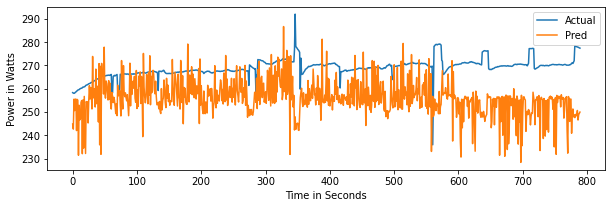

Linear Regression
Mean absolute error: 11.46
Mean absolute percentage error: 4.24
Standard deviation of test set: 3.75


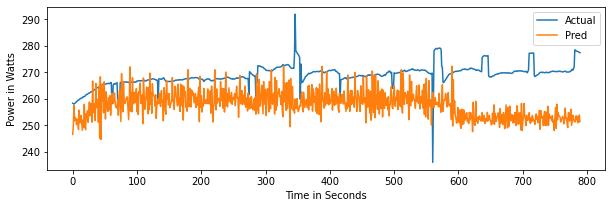

Decision Tree
Mean absolute error: 37.03
Mean absolute percentage error: 13.78
Standard deviation of test set: 3.75


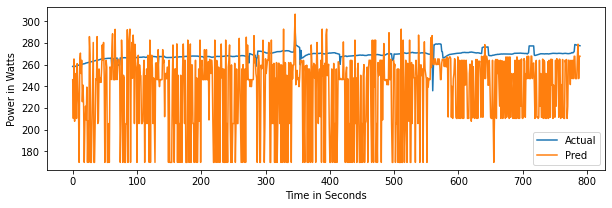

Random Forest
Mean absolute error: 14.27
Mean absolute percentage error: 5.3
Standard deviation of test set: 3.75


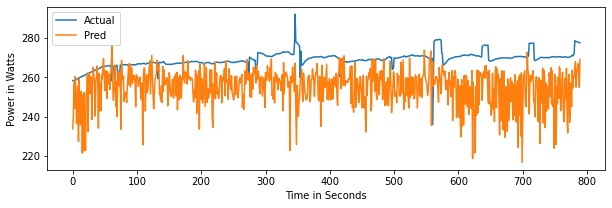

SVR
Mean absolute error: 9.95
Mean absolute percentage error: 3.7
Standard deviation of test set: 3.75


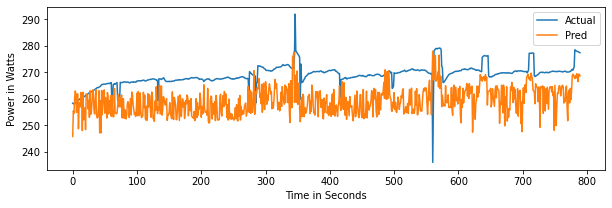

XGBoost
Mean absolute error: 59.28
Mean absolute percentage error: 22.02
Standard deviation of test set: 3.75


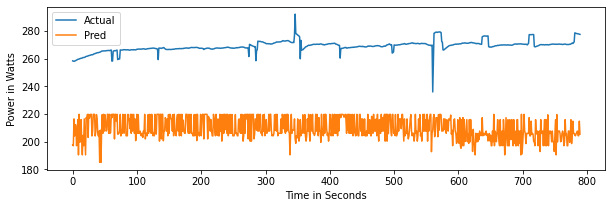

Lasso
Mean absolute error: 11.06
Mean absolute percentage error: 4.1
Standard deviation of test set: 3.75


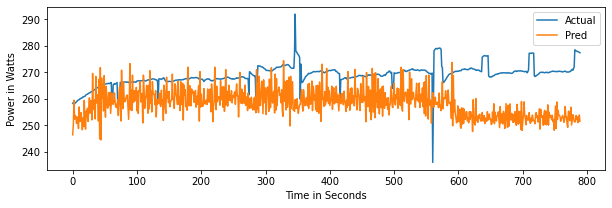

13.6
5.04
3.75
0
11.46
4.24
3.75
0
37.03
13.78
3.75
0
14.27
5.3
3.75
0
9.95
3.7
3.75
0
59.28
22.02
3.75
0
11.06
4.1
3.75
0
exp2multi
exp1multi included in training set
exp3multi included in training set
exp4multi included in training set
exp5multi included in training set
exp6multi included in training set
exp2multi included in testing set
exp2multi


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:183: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:188: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:86: DataConversionWarning: A column-vector y was passed when a 1d array was

NN
Mean absolute error: 30.92
Mean absolute percentage error: 11.99
Standard deviation of test set: 16.7


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.349e+05, tolerance: 1.561e+02
  model = cd_fast.enet_coordinate_descent(


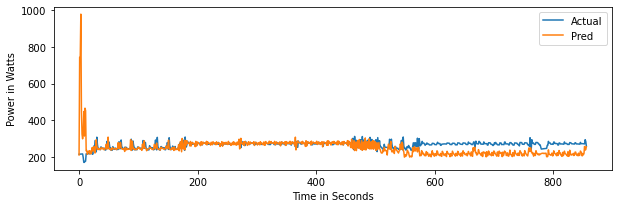

Linear Regression
Mean absolute error: 16.65
Mean absolute percentage error: 6.47
Standard deviation of test set: 16.7


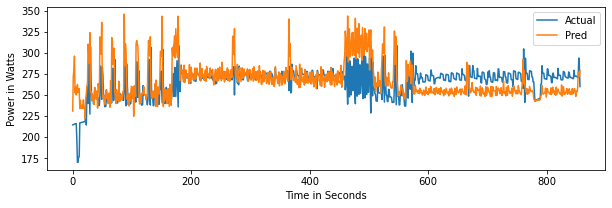

Decision Tree
Mean absolute error: 26.6
Mean absolute percentage error: 10.08
Standard deviation of test set: 16.7


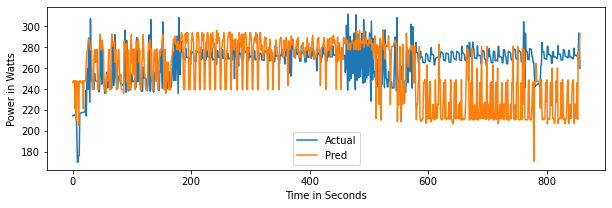

Random Forest
Mean absolute error: 24.04
Mean absolute percentage error: 9.12
Standard deviation of test set: 16.7


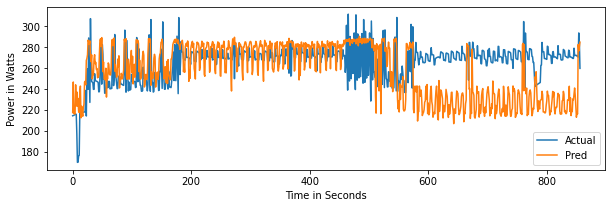

SVR
Mean absolute error: 16.0
Mean absolute percentage error: 6.13
Standard deviation of test set: 16.7


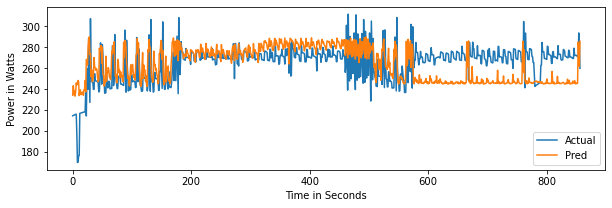

XGBoost
Mean absolute error: 60.57
Mean absolute percentage error: 22.64
Standard deviation of test set: 16.7


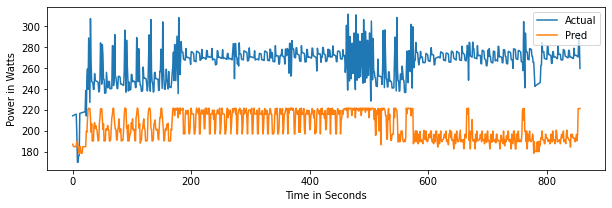

Lasso
Mean absolute error: 16.19
Mean absolute percentage error: 6.28
Standard deviation of test set: 16.7


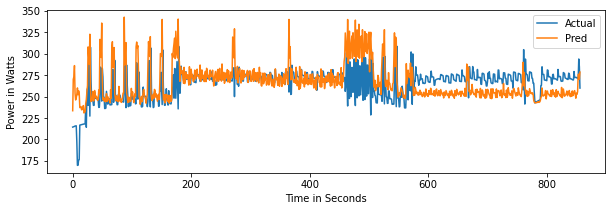

30.92
11.99
16.7
0
16.65
6.47
16.7
0
26.6
10.08
16.7
0
24.04
9.12
16.7
0
16.0
6.13
16.7
0
60.57
22.64
16.7
0
16.19
6.28
16.7
0
exp3multi
exp1multi included in training set
exp2multi included in training set
exp4multi included in training set
exp5multi included in training set
exp6multi included in training set
exp3multi included in testing set
exp3multi


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:183: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:188: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:86: DataConversionWarning: A column-vector y was passed when a 1d array was

NN
Mean absolute error: 12.81
Mean absolute percentage error: 4.5
Standard deviation of test set: 5.46


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.965e+05, tolerance: 1.280e+02
  model = cd_fast.enet_coordinate_descent(


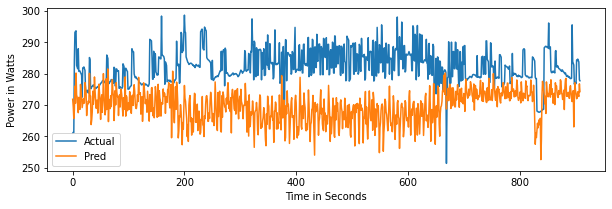

Linear Regression
Mean absolute error: 17.08
Mean absolute percentage error: 6.03
Standard deviation of test set: 5.46


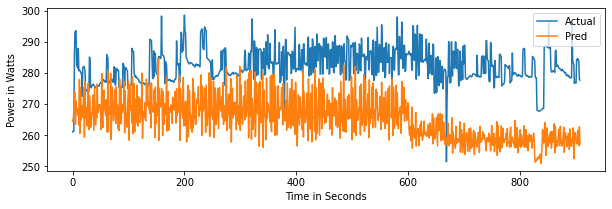

Decision Tree
Mean absolute error: 14.99
Mean absolute percentage error: 5.29
Standard deviation of test set: 5.46


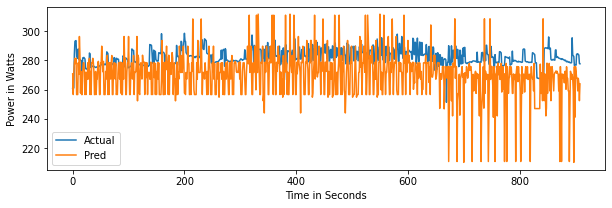

Random Forest
Mean absolute error: 13.56
Mean absolute percentage error: 4.78
Standard deviation of test set: 5.46


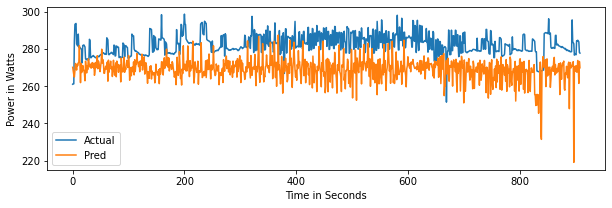

SVR
Mean absolute error: 13.54
Mean absolute percentage error: 4.77
Standard deviation of test set: 5.46


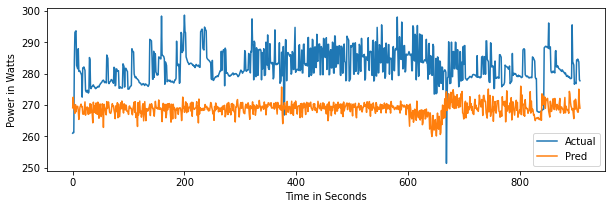

XGBoost
Mean absolute error: 70.27
Mean absolute percentage error: 24.87
Standard deviation of test set: 5.46


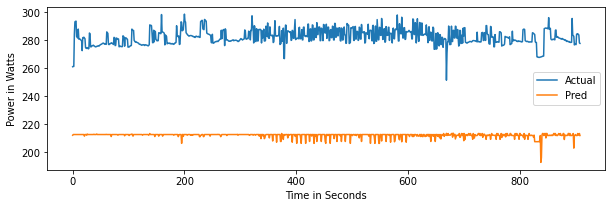

Lasso
Mean absolute error: 17.05
Mean absolute percentage error: 6.02
Standard deviation of test set: 5.46


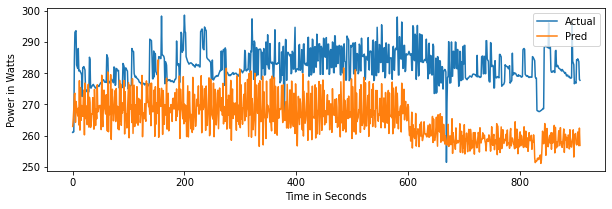

12.81
4.5
5.46
0
17.08
6.03
5.46
0
14.99
5.29
5.46
0
13.56
4.78
5.46
0
13.54
4.77
5.46
0
70.27
24.87
5.46
0
17.05
6.02
5.46
0
exp4multi
exp1multi included in training set
exp2multi included in training set
exp3multi included in training set
exp5multi included in training set
exp6multi included in training set
exp4multi included in testing set
exp4multi


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:183: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:188: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:86: DataConversionWarning: A column-vector y was passed when a 1d array was

NN
Mean absolute error: 12.01
Mean absolute percentage error: 4.79
Standard deviation of test set: 11.74


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.720e+05, tolerance: 1.647e+02
  model = cd_fast.enet_coordinate_descent(


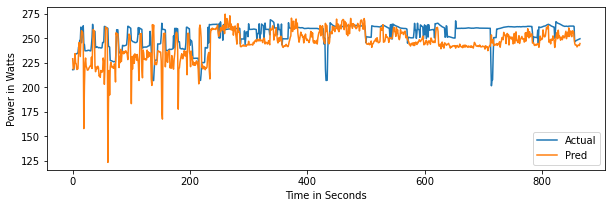

Linear Regression
Mean absolute error: 7.16
Mean absolute percentage error: 2.91
Standard deviation of test set: 11.74


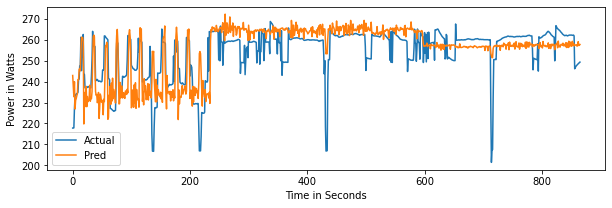

Decision Tree
Mean absolute error: 17.13
Mean absolute percentage error: 6.81
Standard deviation of test set: 11.74


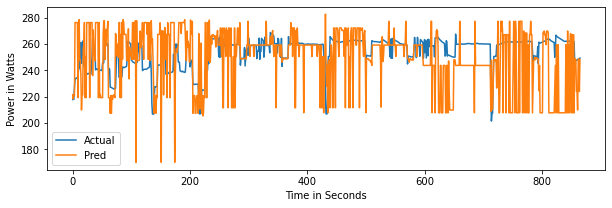

Random Forest
Mean absolute error: 9.71
Mean absolute percentage error: 3.9
Standard deviation of test set: 11.74


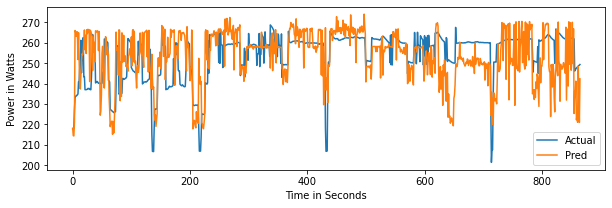

SVR
Mean absolute error: 6.56
Mean absolute percentage error: 2.66
Standard deviation of test set: 11.74


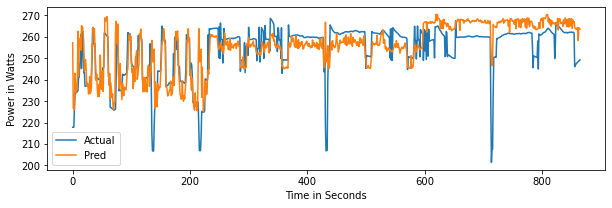

XGBoost
Mean absolute error: 50.46
Mean absolute percentage error: 19.74
Standard deviation of test set: 11.74


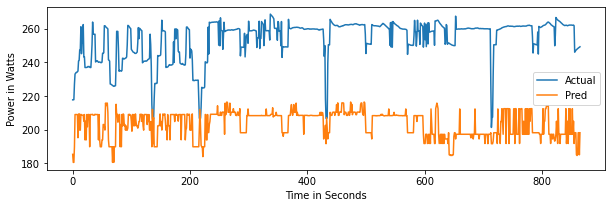

Lasso
Mean absolute error: 7.1
Mean absolute percentage error: 2.89
Standard deviation of test set: 11.74


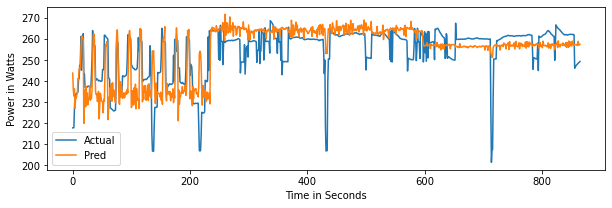

12.01
4.79
11.74
0
7.16
2.91
11.74
0
17.13
6.81
11.74
0
9.71
3.9
11.74
0
6.56
2.66
11.74
0
50.46
19.74
11.74
0
7.1
2.89
11.74
0
exp5multi
exp1multi included in training set
exp2multi included in training set
exp3multi included in training set
exp4multi included in training set
exp6multi included in training set
exp5multi included in testing set
exp5multi


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:183: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:188: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:86: DataConversionWarning: A column-vector y was passed when a 1d array was

NN
Mean absolute error: 11.18
Mean absolute percentage error: 4.86
Standard deviation of test set: 13.8


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.827e+05, tolerance: 1.360e+02
  model = cd_fast.enet_coordinate_descent(


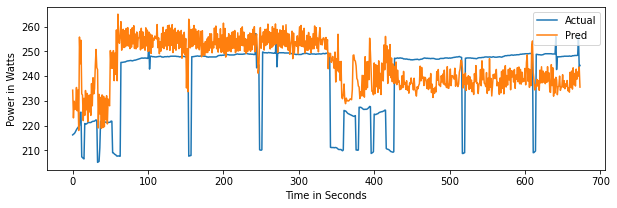

Linear Regression
Mean absolute error: 18.63
Mean absolute percentage error: 8.07
Standard deviation of test set: 13.8


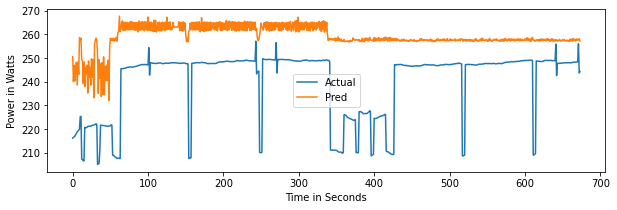

Decision Tree
Mean absolute error: 10.17
Mean absolute percentage error: 4.45
Standard deviation of test set: 13.8


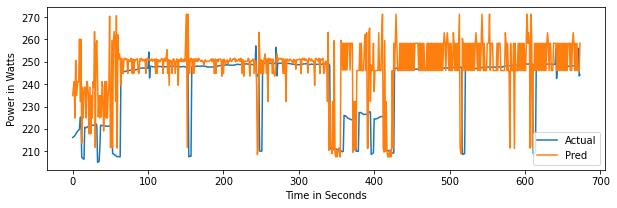

Random Forest
Mean absolute error: 9.34
Mean absolute percentage error: 4.1
Standard deviation of test set: 13.8


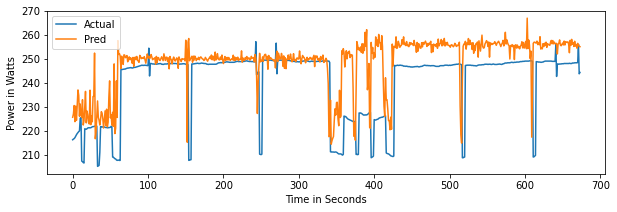

SVR
Mean absolute error: 22.3
Mean absolute percentage error: 9.66
Standard deviation of test set: 13.8


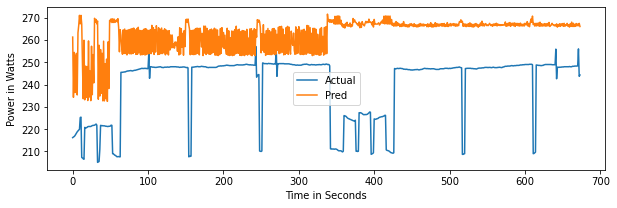

XGBoost
Mean absolute error: 38.12
Mean absolute percentage error: 15.6
Standard deviation of test set: 13.8


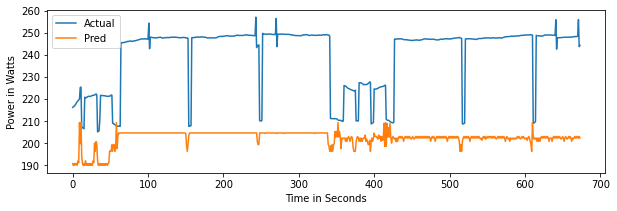

Lasso
Mean absolute error: 18.64
Mean absolute percentage error: 8.08
Standard deviation of test set: 13.8


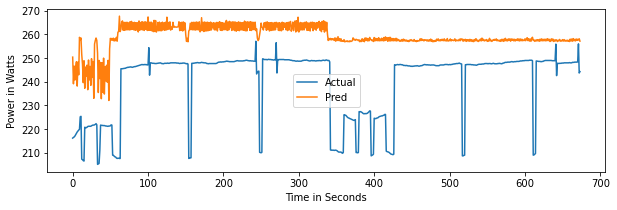

11.18
4.86
13.8
0
18.63
8.07
13.8
0
10.17
4.45
13.8
0
9.34
4.1
13.8
0
22.3
9.66
13.8
0
38.12
15.6
13.8
0
18.64
8.08
13.8
0
exp6multi
exp1multi included in training set
exp2multi included in training set
exp3multi included in training set
exp4multi included in training set
exp5multi included in training set
exp6multi included in testing set
exp6multi


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:183: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:188: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58318/222137919.py:86: DataConversionWarning: A column-vector y was passed when a 1d array was

NN
Mean absolute error: 15.83
Mean absolute percentage error: 7.29
Standard deviation of test set: 23.01


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e+05, tolerance: 1.305e+02
  model = cd_fast.enet_coordinate_descent(


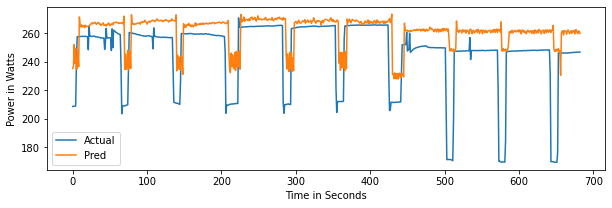

Linear Regression
Mean absolute error: 19.09
Mean absolute percentage error: 8.73
Standard deviation of test set: 23.01


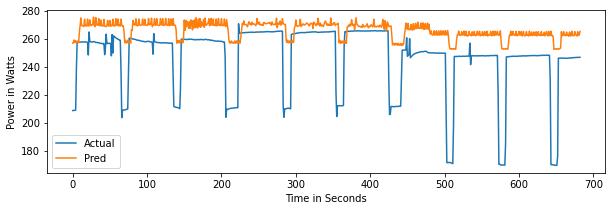

Decision Tree
Mean absolute error: 17.85
Mean absolute percentage error: 7.97
Standard deviation of test set: 23.01


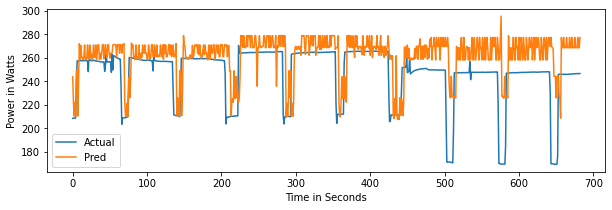

Random Forest
Mean absolute error: 16.69
Mean absolute percentage error: 7.57
Standard deviation of test set: 23.01


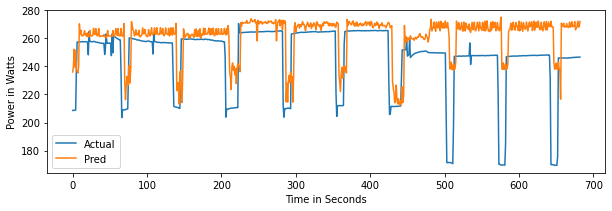

SVR
Mean absolute error: 21.18
Mean absolute percentage error: 9.59
Standard deviation of test set: 23.01


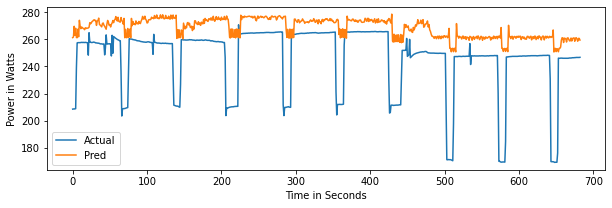

XGBoost
Mean absolute error: 38.55
Mean absolute percentage error: 15.36
Standard deviation of test set: 23.01


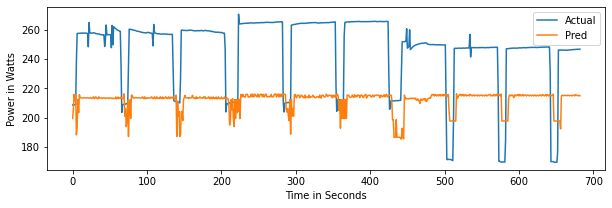

Lasso
Mean absolute error: 19.11
Mean absolute percentage error: 8.73
Standard deviation of test set: 23.01


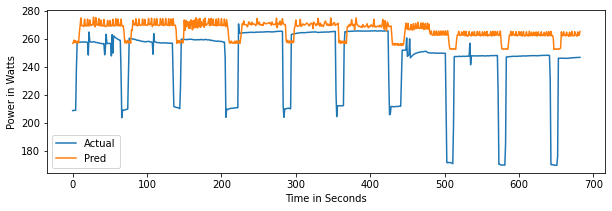

15.83
7.29
23.01
0
19.09
8.73
23.01
0
17.85
7.97
23.01
0
16.69
7.57
23.01
0
21.18
9.59
23.01
0
38.55
15.36
23.01
0
19.11
8.73
23.01
0


In [5]:
# res_df = pd.DataFrame()

def destandardize(var):
        return var 
def run_models(ts):
    global res_df
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True

    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, :-3].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, :-3].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)

    
    #     newVar=var+mean_
    #     return newVar

    preds1 = {}

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['NN'] = y_pred.flatten()

    ss = StandardScaler(with_std=False)
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, :-3].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, :-3].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta0 = model.intercept_
    y_pred = model.predict(X2)
    # print(y_pred)
    y_pred=destandardize(y_pred)
    preds1['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['SVR'] = y_pred.flatten()

    model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001, booster='gbtree')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Lasso'] = y_pred.flatten()


    models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
#     models = ['NN']
    results = {}
    oldY=df_test.power
    std_Y=np.std(df_test.power)
    for m in models:
        l = len(preds1[m])
        p1 = (preds1[m][:l])
        total_pred = p1 if p_flag == False else (p1 + p_idle)
#         if m == 'SVR':
#             total_pred -= svr_i
#         else:
#             total_pred -= beta_0[t]
        
        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
        
        print(m)
        print("Mean absolute error:", mae)
        print("Mean absolute percentage error:", mape)
        print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results[m] = [mae, mape, std_Y]
        df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
        plt.figure(figsize=(10, 3))
        plt.plot(df_plot)
        plt.legend(df_plot.columns)
        plt.ylabel("Power in Watts")
        plt.xlabel("Time in Seconds")
        plt.show()

    results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

    for i, row in results_df.T.iterrows():
        print(row['MAE'])
        print(row['MAPE'])
        print(row['STD'])
        print(0)

# testing  = ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'filebench_all', 'ycsbmongo_all2']
# testing = ['all_mem']
# testing = ['all_7zip', 'all_cp2k', 'all_stream', 'all_tinymembench', 'all_leveldb', 'all_sqlite']
testing = ['exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi']
for ts in testing:
    print(ts)
    # trainset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle', 'idlerun', 'stresscpu', 'stressdram', 'stressdisk']
    # trainset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle']
#     trainset = ['cpuexp', 'memexp', 'diskexp', 'all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'stresscpu', 'all_stream',  'all_ramspeed', 'all_tinymembench', 'all_mbw', 'stressdram', 'all_fio', 'all_linux', 'all_leveldb', 'all_sqlite', 'stressdisk', 'filebench_all', 'ycsbmongo_all2']
    trainset = ['exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi']
    # trainset = ['exp1']
    # testset = ['manual_mc1']
    testset = [ts]

    # ignoreset = ['filebench_all', 'ycsbmongo_all2',]
#     ignoreset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2']
    ignoreset = ['cpuexp', 'memexp', 'diskexp', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'stresscpu', 'all_stream',  'all_ramspeed', 'all_tinymembench', 'all_mbw', 'stressdram', 'all_fio', 'all_linux', 'all_leveldb', 'all_sqlite', 'stressdisk']
    # ignoreset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1']
    alwaysignore = []
    # alwaysignore = ['7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'syscpu', 'sysmem', 'mc2', 'idle']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
    # print(trainset[0], "included in training set")
    for t in trainset:
        if t in testset or t in ignoreset or t in alwaysignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set")

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

In [4]:
res_df = results_df.T.append(results_df.T)

for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

NameError: name 'results_df' is not defined

In [ ]:
for i, row in res_df.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

In [5]:

p_flag = False
b_flag = False
r_flag = False

df_idle = pd.read_csv("datasets/final-idlerun.csv")
df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
p_idle = np.mean(df_idle.power)
df_mean = []
for i in df_idle:
    df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
if p_flag == True:

    df_train.power -= p_idle
if r_flag == True:
    colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
    i = 0
    for cols in colNames:
        df_train[cols] -= df_mean[i]
        df_test[cols] -= df_mean[i]
        i += 1

from sklearn.preprocessing import StandardScaler

ss = StandardScaler(with_std=False)
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
# ss = StandardScaler()
sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

X1 = sc_X.iloc[:, :-3].values
y1 = df_train.iloc[:, -1:].values
X2 = sc_Y.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

std_=np.std(df_train.power)
mean_=np.mean(df_train.power)

def destandardize(var):
    return var
#     newVar=var+mean_
#     return newVar

preds1 = {}

model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
preds1['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=b_flag)
model.fit(X1, y1)
beta0 = model.intercept_
y_pred = model.predict(X2)
# print(y_pred)
y_pred=destandardize(y_pred)
preds1['Linear Regression'] = y_pred.flatten()

model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
preds1['Decision Tree'] = y_pred.flatten()

model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
preds1['Random Forest'] = y_pred.flatten()

model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
preds1['SVR'] = y_pred.flatten()

model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
preds1['XGBoost'] = y_pred.flatten()

model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
preds1['Lasso'] = y_pred.flatten()


models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
# models = ['Linear Regression']
results = {}
oldY=df_test.power
std_Y=np.std(df_test.power)
for m in models:
    l = len(preds1[m])
    p1 = (preds1[m][:l])
    total_pred = p1 if p_flag == False else (p1 + p_idle)
    mae = mean_absolute_error(oldY[:l], total_pred)
    mape = mean_absolute_percentage_error(oldY[:l], total_pred)
    mae = round(mae, 2)
    mape = round((mape*100), 2)
    std_Y = round(std_Y, 2)
#         print(m)
#         print("Mean absolute error:", mae)
#         print("Mean absolute percentage error:", mape)
#         print("Standard deviation of test set:", std_Y)
    # add results to dictionary
    results[m] = [mae, mape, std_Y]
#         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
#         plt.figure(figsize=(10, 3))
#         plt.plot(df_plot)
#         plt.legend(df_plot.columns)
#         plt.ylabel("Power in Watts")
#         plt.xlabel("Time in Seconds")
#         plt.show()

results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)
    

/Users/roton/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/5l/144n_3m9249dj9_cd9m97pf80000gn/T/ipykernel_68817/2221178142.py:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)
/Users/roton/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


58.8
37.49
59.6
0
179.2
106.69
59.6
0
54.53
24.98
59.6
0
43.12
19.93
59.6
0
7.33
4.4
59.6
0
66.3
35.87
59.6
0
28.49
17.37
59.6
0


/Users/roton/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.242e+06, tolerance: 6.498e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
beta0

In [40]:
p_flag = False
b_flag = True
r_flag = False

In [41]:
df_idle = pd.read_csv("datasets/final-idlerun.csv")
df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
p_idle = np.mean(df_idle.power)
df_mean = []
for i in df_idle:
    df_mean.append(np.mean(df_idle[i]))
    print(np.mean(df_idle[i]))
print(df_mean)
if p_flag == True:
    
    df_train.power -= p_idle
if r_flag == True:
    colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
    i = 0
    for cols in colNames:
        df_train[cols] -= df_mean[i]
        df_test[cols] -= df_mean[i]
        i += 1

139525.6425594838
2144206.458932652
30720.24089259309
152158.27409598065
3815.8623470896628
1953721.5217099073
586528726.6252184
905873494.2677779
683643043.2750369
61.93462293319
12.730200295738594
118.01911547250978
[139525.6425594838, 2144206.458932652, 30720.24089259309, 152158.27409598065, 3815.8623470896628, 1953721.5217099073, 586528726.6252184, 905873494.2677779, 683643043.2750369, 61.93462293319, 12.730200295738594, 118.01911547250978]


In [42]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
# ss = StandardScaler()
sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

X1 = sc_X.iloc[:, :-3].values
y1 = sc_X.iloc[:, -1:].values
X2 = sc_Y.iloc[:, :-3].values
y2 = sc_Y.iloc[:, -1:].values

std_=np.std(df_train.power)
mean_=np.mean(df_train.power)

def destandardize(var):
#     return var
    newVar=var*std_+mean_
    return newVar

In [46]:
preds1 = {}

# model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# preds1['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=b_flag)
model.fit(X1, y1)
beta0 = model.intercept_
y_pred = model.predict(X2)
# print(y_pred)
y_pred=destandardize(y_pred)
preds1['Linear Regression'] = y_pred.flatten()

# model = DecisionTreeRegressor()
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# preds1['Decision Tree'] = y_pred.flatten()

# model = RandomForestRegressor()
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# preds1['Random Forest'] = y_pred.flatten()
 
# model = SVR()
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# preds1['SVR'] = y_pred.flatten()

# model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# preds1['XGBoost'] = y_pred.flatten()

# model = Lasso(alpha=0.1)
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# preds1['Lasso'] = y_pred.flatten()


Linear Regression
Mean absolute error: 47.04
Mean absolute percentage error: 22.01
Standard deviation of test set: 45.19


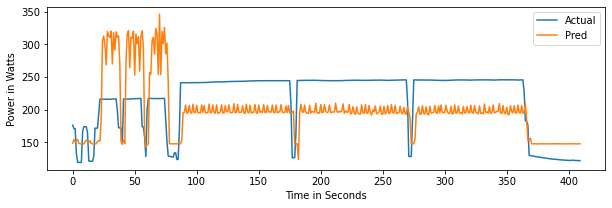

In [48]:
# models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
models = ['Linear Regression']

results = {}
oldY=df_test.power
std_=np.std(df_test.power)
for m in models:
    l = len(preds1[m])
    p1 = (preds1[m][:l])
    total_pred = p1 if p_flag == False else (p1 + p_idle)
    mae = mean_absolute_error(oldY[:l], total_pred)
    mape = mean_absolute_percentage_error(oldY[:l], total_pred)
    mae = round(mae, 2)
    mape = round((mape*100), 2)
    std_ = round(std_, 2)
    print(m)
    print("Mean absolute error:", mae)
    print("Mean absolute percentage error:", mape)
    print("Standard deviation of test set:", std_)
    # add results to dictionary
    results[m] = [mae, mape, std_]
    df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
    plt.figure(figsize=(10, 3))
    plt.plot(df_plot)
    plt.legend(df_plot.columns)
    plt.ylabel("Power in Watts")
    plt.xlabel("Time in Seconds")
    plt.show()

results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

In [32]:
print('MAPE:')
for i, row in results_df.T.iterrows():
    print(i + ' ' +  str(row['MAPE']) + '%')

MAPE:
NN 14.85%
Linear Regression 21.16%
Decision Tree 33.02%
Random Forest 27.26%
SVR 19.81%
XGBoost 16.96%
Lasso 20.65%


In [33]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

32.41
14.85
45.19
0
44.89
21.16
45.19
0
72.98
33.02
45.19
0
61.44
27.26
45.19
0
44.25
19.81
45.19
0
33.82
16.96
45.19
0
45.35
20.65
45.19
0


In [45]:
beta0

array([1.60205253e-16])

In [21]:
print(df_test.iloc[70])
print('Predicted power:',preds1['Linear Regression'][70], 'Actual power:', df_test.power[70])
print(df_test.iloc[97])
print('Predicted power:',preds1['Linear Regression'][97], 'Actual power:', df_test.power[97])

LLC-load-misses     1.848620e+05
LLC-loads           9.196380e+05
LLC-store-misses    6.019832e+07
LLC-stores          9.418054e+07
blocks              4.384000e+03
bytes               2.244608e+06
cycles              1.359864e+11
instructions        1.069510e+10
ref-cycles          1.351273e+11
pkg_pwr             1.449100e+02
ram_pwr             1.671000e+01
power               2.167000e+02
Name: 70, dtype: float64
Predicted power: 739.708718699258 Actual power: 216.7
LLC-load-misses     1.856380e+05
LLC-loads           3.299070e+05
LLC-store-misses    1.712600e+04
LLC-stores          6.761200e+04
blocks              1.288000e+04
bytes               6.594560e+06
cycles              1.285562e+11
instructions        4.272212e+10
ref-cycles          1.285953e+11
pkg_pwr             1.680000e+02
ram_pwr             1.423000e+01
power               2.412000e+02
Name: 97, dtype: float64
Predicted power: 255.9879141337122 Actual power: 241.2


In [189]:
sc_Y.iloc[50:100]

,0,1,2,3,4,5,6,7,8,9,10,11
50,-0.328053,-0.492784,2.177053,0.686099,-0.189761,-0.189761,1.937640,-0.204670,1.952142,0.912720,0.323763,0.785609
51,-0.326210,-0.488022,3.654533,1.262695,-0.201123,-0.201123,3.251817,-0.092466,3.240767,0.910686,0.317468,0.787241
52,-0.326839,-0.487221,3.272515,1.110128,-0.201123,-0.201123,3.025051,-0.112891,3.026508,0.912924,0.313271,0.788873
53,-0.326560,-0.488372,3.577053,1.231692,-0.201123,-0.201123,3.198021,-0.088192,3.202719,0.910889,0.330058,0.790506
54,-0.328152,-0.493165,2.304368,0.738898,-0.192286,-0.192286,2.000683,-0.203327,1.997995,0.909261,0.311172,0.792138
55,-0.326301,-0.488314,3.436631,1.175508,-0.197668,-0.197668,3.244111,-0.101097,3.212416,0.909668,0.327960,0.790506
56,-0.326600,-0.486989,3.733653,1.302387,-0.201123,-0.201123,3.291419,-0.084538,3.258126,0.910686,0.323763,0.083690
57,-0.326556,-0.488662,3.106107,1.047631,-0.201123,-0.201123,2.883906,-0.116181,2.880688,0.886676,0.309074,0.077160
58,-0.327529,-0.465438,0.275329,0.241846,-0.201123,-0.201123,0.109108,-0.205558,0.087252,0.126503,-0.125294,-0.175857
59,-0.329809,-0.454643,-0.383893,-0.168788,-0.201123,-0.201123,-0.410011,-0.194731,-0.410528,0.100458,-0.131590,-0.662303


In [32]:
np.mean(df_train.power)

130.18998950472238

In [21]:
p_idle = np.mean(df_idle.power)

In [54]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_train, test_size=0.3)

In [86]:
# df_train.power -= p_idle
oldY=df_test.power
std_=np.std(df_test.power)
mean_=np.mean(df_test.power)
oldY

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
# ss = StandardScaler()
sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

std = np.std(sc_Y[11])

# X1 = sc_X.iloc[:, :-3].values
# y1 = sc_X.iloc[:, -1:].values

# X2 = sc_Y.iloc[:, :-3].values
# y2 = sc_Y.iloc[:, -1:].values

# X2 = df_test.iloc[:, :-1].values
# y2 = df_test.iloc[:, -1:].values



def destandardize(var):
    return var
#     newVar=var*std_+mean_
#     return newVar

LinearRegression(fit_intercept=False)
Model coefficients: [[   3.45161207   20.5363892    57.28790779  -54.17354037    1.44494205
     1.44494205  176.67990055    5.57211468 -157.07529327]]
Model intercept: 0.0
Mean absolute error: 206.81
Mean absolute percentage error: 73.39
Standard deviation of test set: 21.42


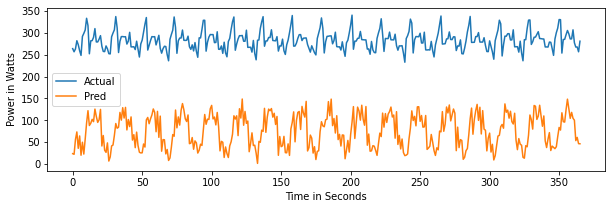

DecisionTreeRegressor()
Mean absolute error: 42.3
Mean absolute percentage error: 15.07
Standard deviation of test set: 21.42


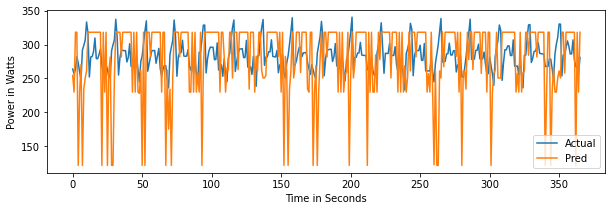

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_92601/3625126220.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


RandomForestRegressor()
Mean absolute error: 40.76
Mean absolute percentage error: 13.85
Standard deviation of test set: 21.42


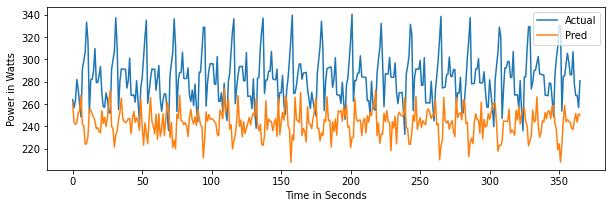

In [88]:
# X1 = df_train.iloc[:, :-3].values
# y1 = df_train.iloc[:, -1:].values
# X2 = df_test.iloc[:, :-3].values
# y2 = df_test.iloc[:, -1:].values
p_idle = 0
X1 = sc_X.iloc[:, :-3].values
y1 = df_train.iloc[:, -1:].values
X2 = sc_Y.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

# from sklearn.model_selection import train_test_split

# X1, X2, y1, y2 = train_test_split(X1, y1, test_size=0.33, random_state=42)

# oldY = y2

# Import necessary modules
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


results2 = {}

# model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
# model.fit(X1, y1)
# y_pred = model.predict(X2)

# y_pred=destandardize(y_pred)
# y_pred += p_idle
# mae = mean_absolute_error(oldY, y_pred)
# mape = mean_absolute_percentage_error(oldY, y_pred)
# mae = round(mae, 2)
# mape = round((mape*100), 2)
# std_ = round(std_, 2)
# print(model)
# print("Mean absolute error:", mae)
# print("Mean absolute percentage error:", mape)
# print("Standard deviation of test set:", std_)
# # add results to dictionary
# results2['NN'] = [mae, mape, std_]
# df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
# plt.figure(figsize=(10, 3))
# plt.plot(df_plot)
# plt.legend(df_plot.columns)
# plt.ylabel("Power in Watts")
# plt.xlabel("Time in Seconds")
# plt.show()



model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
y_pred += p_idle

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results2['Linear Regression'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
y_pred += p_idle

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results2['Decision Tree'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# Create a random forst regression model
model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)
y_pred += p_idle

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results2['Random Forest'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


 
# model = SVR()
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# y_pred += p_idle

# mae = mean_absolute_error(oldY, y_pred)
# mape = mean_absolute_percentage_error(oldY, y_pred)
# mae = round(mae, 2)
# mape = round((mape*100), 2)
# std_ = round(std_, 2)
# print(model)
# print("Mean absolute error:", mae)
# print("Mean absolute percentage error:", mape)
# print("Standard deviation of test set:", std_)
# # add results to dictionary
# results2['SVR'] = [mae, mape, std_]
# df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
# plt.figure(figsize=(10, 3))
# plt.plot(df_plot)
# plt.legend(df_plot.columns)
# plt.ylabel("Power in Watts")
# plt.xlabel("Time in Seconds")
# plt.show()



# model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# y_pred += p_idle

# mae = mean_absolute_error(oldY, y_pred)
# mape = mean_absolute_percentage_error(oldY, y_pred)
# mae = round(mae, 2)
# mape = round((mape*100), 2)
# std_ = round(std_, 2)
# print(model)
# print("Mean absolute error:", mae)
# print("Mean absolute percentage error:", mape)
# print("Standard deviation of test set:", std_)
# # add results to dictionary
# results2['XGBoost'] = [mae, mape, std_]
# df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
# plt.figure(figsize=(10, 3))
# plt.plot(df_plot)
# plt.legend(df_plot.columns)
# plt.ylabel("Power in Watts")
# plt.xlabel("Time in Seconds")
# plt.show()




# model = Lasso(alpha=0.1)
# model.fit(X1, y1)
# y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
# y_pred += p_idle

# mae = mean_absolute_error(oldY, y_pred)
# mape = mean_absolute_percentage_error(oldY, y_pred)
# mae = round(mae, 2)
# mape = round((mape*100), 2)
# std_ = round(std_, 2)
# print(model)
# print("Mean absolute error:", mae)
# print("Mean absolute percentage error:", mape)
# print("Standard deviation of test set:", std_)
# # add results to dictionary
# results2['Lasso'] = [mae, mape, std_]
# df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
# plt.figure(figsize=(10, 3))
# plt.plot(df_plot)
# plt.legend(df_plot.columns)
# plt.ylabel("Power in Watts")
# plt.xlabel("Time in Seconds")
# plt.show()


# convert results to dataframe
results2_df = pd.DataFrame(results2, index=['MAE', 'MAPE', 'STD'])


In [43]:
for i, row in results2_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

119.85
99.26
15.56
0
27.14
22.37
15.56
0
17.92
14.7
15.56
0
19.97
16.41
15.56
0
13.93
11.27
15.56
0
15.63
13.8
15.56
0
14.8
12.54
15.56
0


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(512, 16, 16), learning_rate_init=0.1,
             max_iter=10000)
Mean absolute error: 2.81
Mean absolute percentage error: 2.32
Standard deviation of test set: 10.51


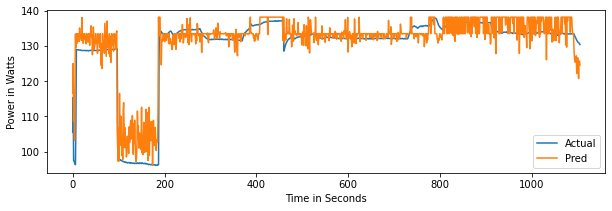

LinearRegression()
Model coefficients: [[ 0.04063846 -0.06469357  0.0042489   0.00391742 -0.00090586 -0.00090586
   0.29915303 -0.05754963 -0.21565365  0.75144421  0.12624343]]
Model intercept: [3.25548473e-16]
Mean absolute error: 1.61
Mean absolute percentage error: 1.35
Standard deviation of test set: 10.51


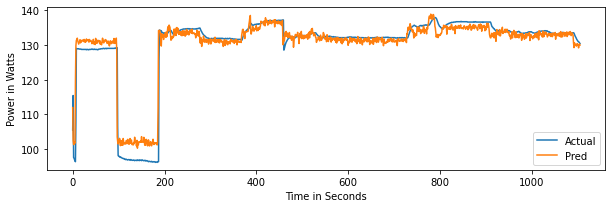

DecisionTreeRegressor()
Mean absolute error: 10.19
Mean absolute percentage error: 8.02
Standard deviation of test set: 10.51


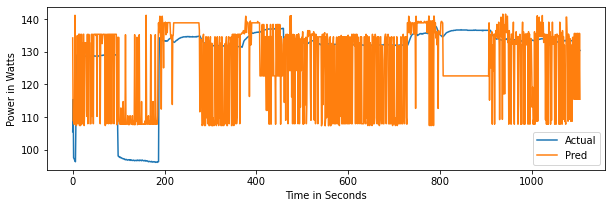

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_71414/3275631197.py:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


RandomForestRegressor()
Mean absolute error: 6.11
Mean absolute percentage error: 5.14
Standard deviation of test set: 10.51


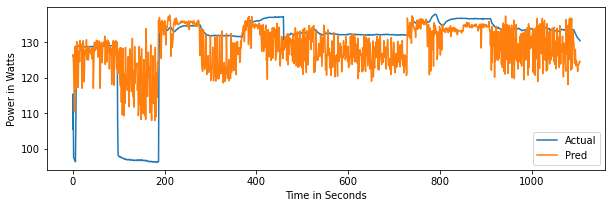

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()
Mean absolute error: 2.37
Mean absolute percentage error: 2.12
Standard deviation of test set: 10.51


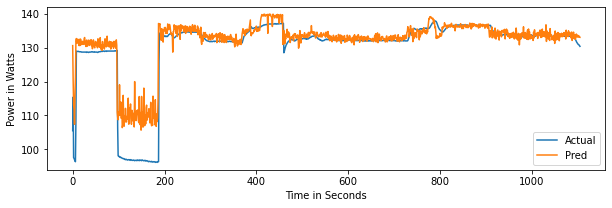

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.001, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)
Mean absolute error: 3.7
Mean absolute percentage error: 3.37
Standard deviation of test set: 10.51


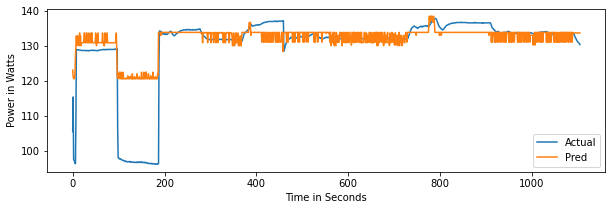

Lasso(alpha=0.1)
Mean absolute error: 2.07
Mean absolute percentage error: 1.77
Standard deviation of test set: 10.51


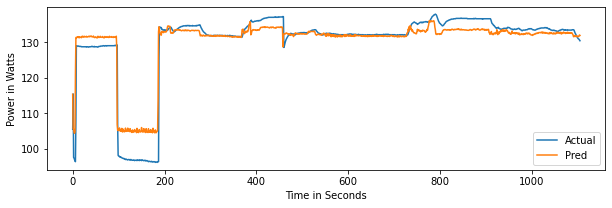

In [60]:



results = {}


model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)

y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['NN'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Linear Regression'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Decision Tree'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# Create a random forst regression model
model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Random Forest'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()

 
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['SVR'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['XGBoost'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()




model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Lasso'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# convert results to dataframe
results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

In [13]:
len(X2[0])

9

In [62]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

2.81
2.32
10.51
0
1.61
1.35
10.51
0
10.19
8.02
10.51
0
6.11
5.14
10.51
0
2.37
2.12
10.51
0
3.7
3.37
10.51
0
2.07
1.77
10.51
0


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression())])
Mean absolute error: 4.95
Mean absolute percentage error: 3.8
Standard deviation of test set: 5.4


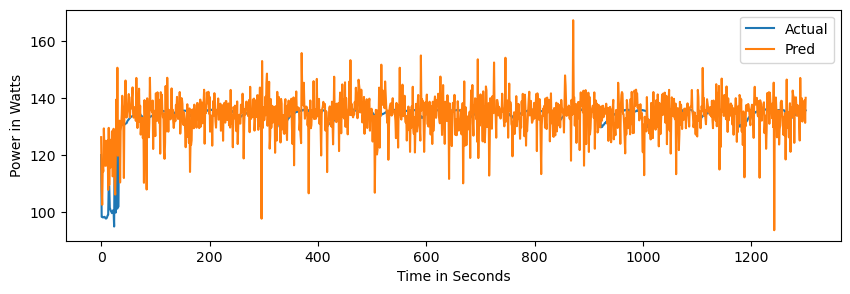

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

d=2
model=make_pipeline(PolynomialFeatures(degree=d,interaction_only=True),LinearRegression())


model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std_, 2))
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



In [110]:
results_df.T

,MAE,MAPE,STD
NN,35.25,12.51,21.42
Linear Regression,9.25,3.28,21.42
Decision Tree,21.19,7.35,21.42
Random Forest,18.07,6.46,21.42
SVR,19.50,7.05,21.42
XGBoost,16.20,5.82,21.42
Lasso,8.73,3.09,21.42


In [111]:
results2_df.T

,MAE,MAPE,STD
NN,16.48,5.83,21.42
Linear Regression,18.23,6.43,21.42
Decision Tree,27.67,9.82,21.42
Random Forest,23.63,8.58,21.42
SVR,28.75,10.19,21.42
XGBoost,18.96,6.91,21.42
Lasso,12.43,4.45,21.42


In [109]:
# convert results to dataframe
results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

,model,MAE_0,MAPE_1,STD_2
0,NN,35.25,12.51,21.42
1,Linear Regression,9.25,3.28,21.42
2,Decision Tree,21.19,7.35,21.42
3,Random Forest,18.07,6.46,21.42
4,SVR,19.50,7.05,21.42
5,XGBoost,16.20,5.82,21.42
6,Lasso,8.73,3.09,21.42


In [120]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print()

35.25
12.51
21.42

9.25
3.28
21.42

21.19
7.35
21.42

18.07
6.46
21.42

19.5
7.05
21.42

16.2
5.82
21.42

8.73
3.09
21.42



In [123]:
for i, row in results2_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

16.48
5.83
21.42
0
18.23
6.43
21.42
0
27.67
9.82
21.42
0
23.63
8.58
21.42
0
28.75
10.19
21.42
0
18.96
6.91
21.42
0
12.43
4.45
21.42
0


In [20]:
arr = ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'filebench_all', 'ycsbmongo_all2']
for x in arr:
    print(x)
    print(round(np.mean(df_all[x]['power']-118), 2))
    for y in df_all[x]:
        print(round(np.mean(df_all[x][y]), 2))

all_mem
66.37
12365359.25
171428297.36
7836152.52
38417368.06
4409.67
2257750.1
46079172454.8
16911057411.94
46427751576.01
115.77
14.54
184.37
all_tf
150.74
88959216.68
532065649.54
14137918.8
61464474.83
8323.23
4261495.7
64701376421.53
50995248215.64
64892232083.82
175.51
22.62
268.74
all_mnn
143.19
26208781.37
215863552.62
19457864.21
51640918.13
3859.97
1976306.84
72849862180.42
46141026189.35
72929595299.74
176.25
17.61
261.19
all_sys
63.13
183413.1
2410038.46
3542025.66
5584231.26
3623.44
1855202.81
56473939447.83
17310528253.71
56568076431.97
114.75
13.69
181.13
filebench_all
41.16
27723.56
554410.1
5798.1
51391.61
5448.61
2789688.39
4689943097.45
13285693681.8
4721952226.01
99.8
12.2
159.16
ycsbmongo_all2
102.75
25238246.96
303927713.17
12920760.04
53569174.29
6985.34
3576494.79
36465995920.17
16419930833.5
36731101563.19
146.33
16.86
220.75


In [9]:
ts = ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'filebench_all', 'ycsbmongo_all2']
for t in ts:
    df = df_all[t]
    print(t)
    print(round(np.mean(df['cycles']), 2))
    print(round(np.mean(df['LLC-load-misses']), 2))
    print(round(np.mean(df['blocks']), 2))

all_mem
46079172454.8
12365359.25
4409.67
all_tf
64701376421.53
88959216.68
8323.23
all_mnn
72849862180.42
26208781.37
3859.97
all_sys
56473939447.83
183413.1
3623.44
filebench_all
4689943097.45
27723.56
5448.61
ycsbmongo_all2
36465995920.17
25238246.96
6985.34
